# Fractional Brownian Motion Ensembles

Ensemble simulations that scan H values are used to validate second order moment calculations.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config
from lib import stats
from lib import plots
from lib.plot_config import PlotDataType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
nplot = 30
npts = 1024
nsims = 500

def generate_ensemble(H):
    samples = numpy.array([fbm.generate_fft(H, npts, Δt)])
    for i in range(1, nsims):
        samples = numpy.append(samples, numpy.array([fbm.generate_fft(H, npts, Δt)]), axis=0)
    return samples

## H=0.5 (Brownian Motion)

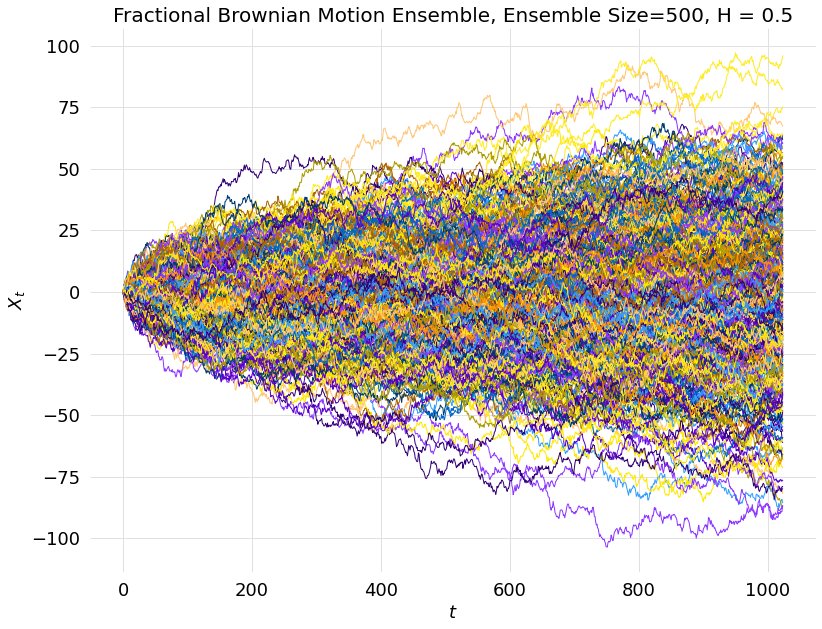

In [3]:
H=0.5
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
plots.comparison(samples, title=title, lw=1, data_type=PlotDataType.ENSEMBLE)

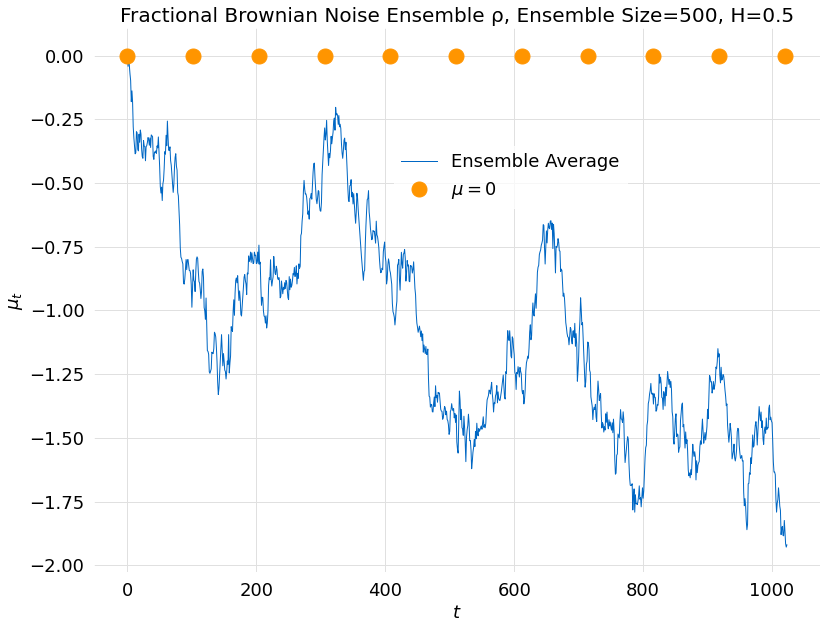

In [4]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Noise Ensemble ρ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(mean, title=title, lw=1, data_type=PlotDataType.FBM_MEAN)

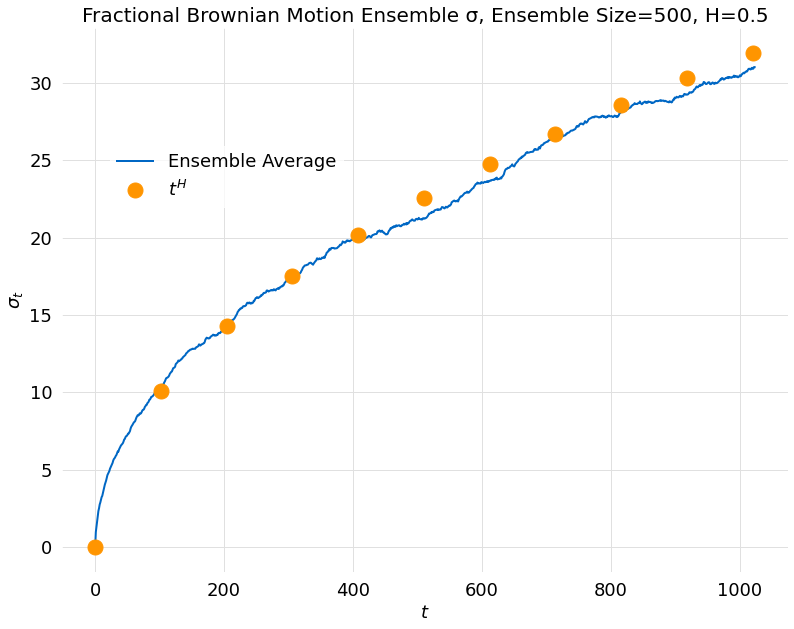

In [5]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(std, title=title, params=[H], data_type=PlotDataType.FBM_STD)

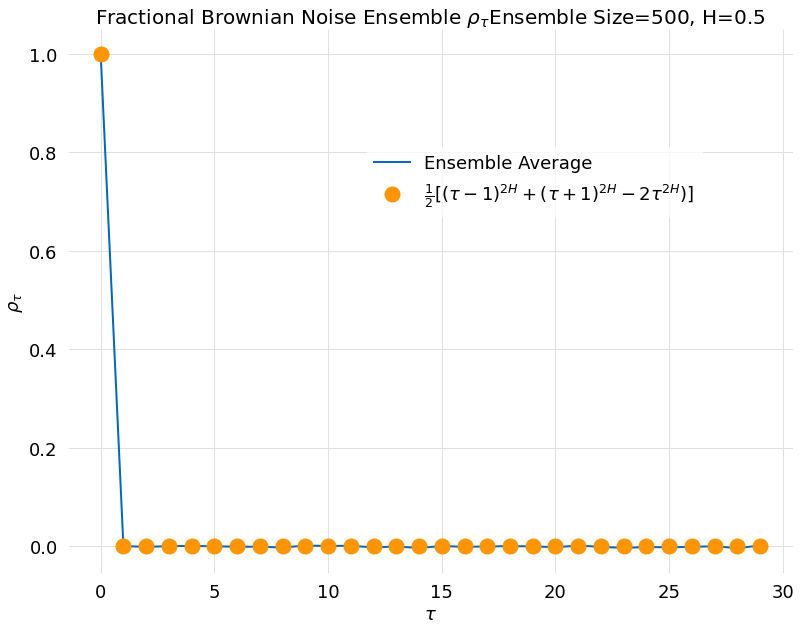

In [6]:
ac = stats.ensemble_acf(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble " + r"$\rho_\tau$" + f"Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(ac[:nplot], title=title, params=[H], npts=nplot, data_type=PlotDataType.FBM_ACF)

## H = 0.7

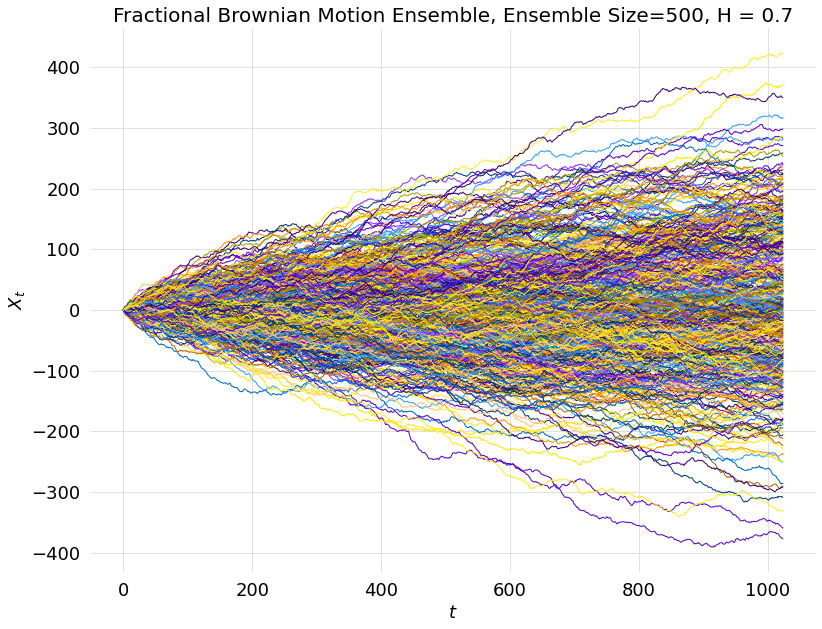

In [7]:
H=0.7
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
plots.comparison(samples, title=title, lw=1, data_type=PlotDataType.ENSEMBLE)

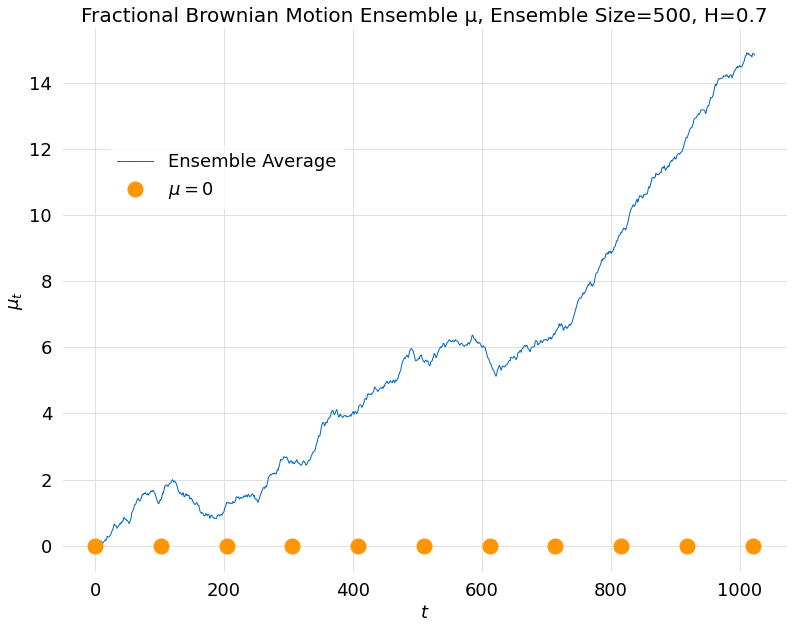

In [8]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Motion Ensemble μ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(mean, title=title, lw=1, data_type=PlotDataType.FBM_MEAN)

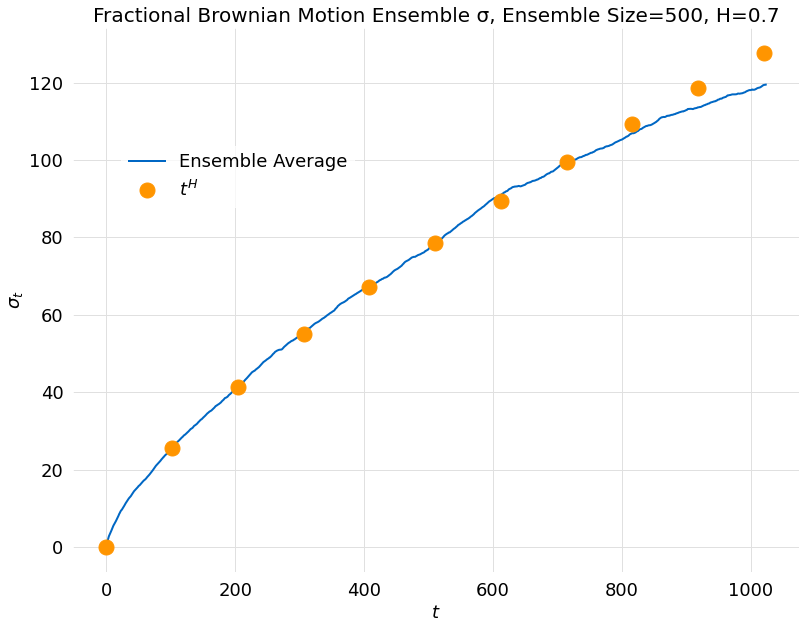

In [9]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(std, title=title, params=[H], data_type=PlotDataType.FBM_STD)

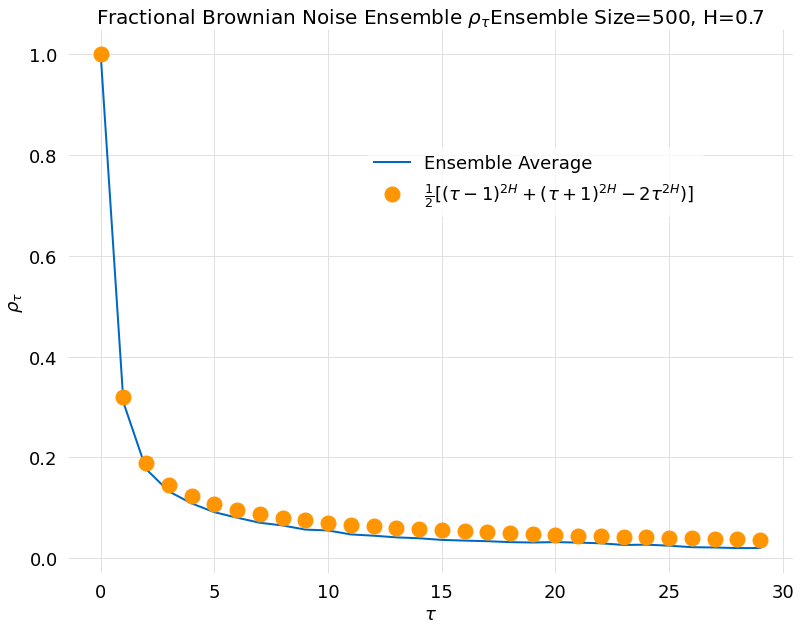

In [10]:
ac = stats.ensemble_acf(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble " + r"$\rho_\tau$" + f"Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(ac[:nplot], title=title, params=[H], npts=nplot, data_type=PlotDataType.FBM_ACF)

## H=0.3

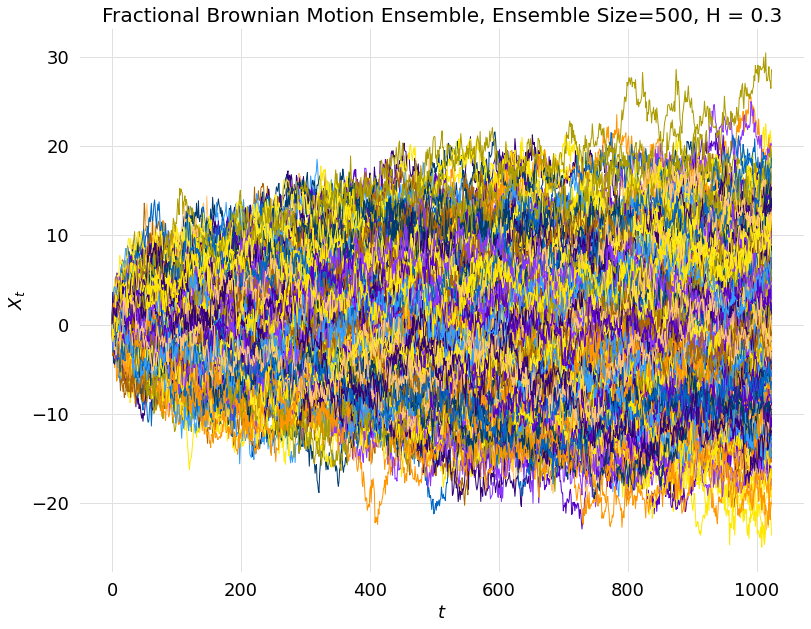

In [11]:
H=0.3
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
plots.comparison(samples, title=title, lw=1, data_type=PlotDataType.ENSEMBLE)

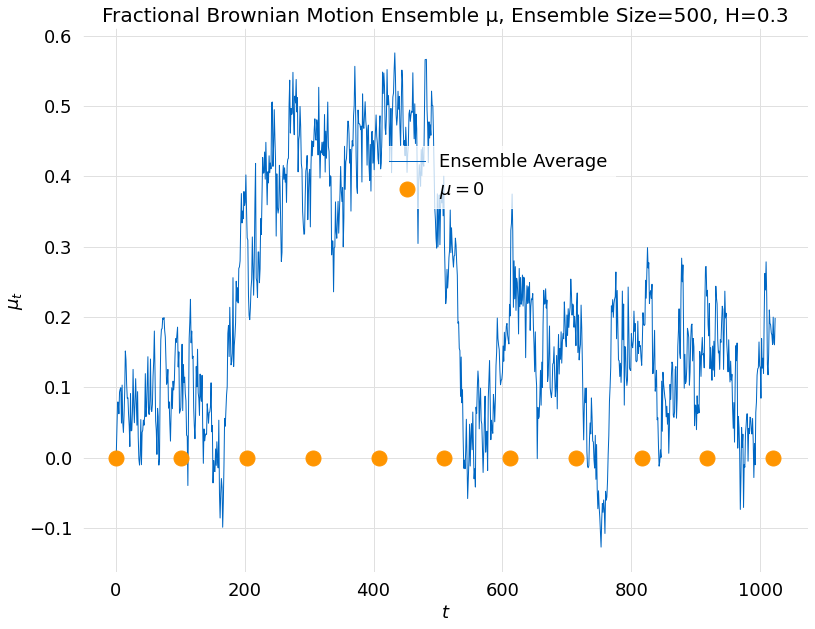

In [12]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Motion Ensemble μ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(mean, title=title, lw=1, data_type=PlotDataType.FBM_MEAN)

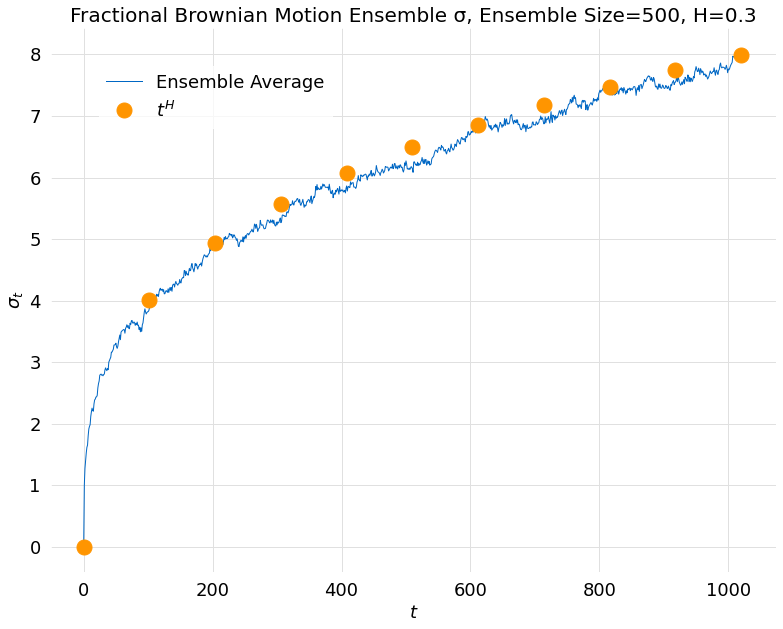

In [13]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(std, title=title, params=[H], lw=1, data_type=PlotDataType.FBM_STD)

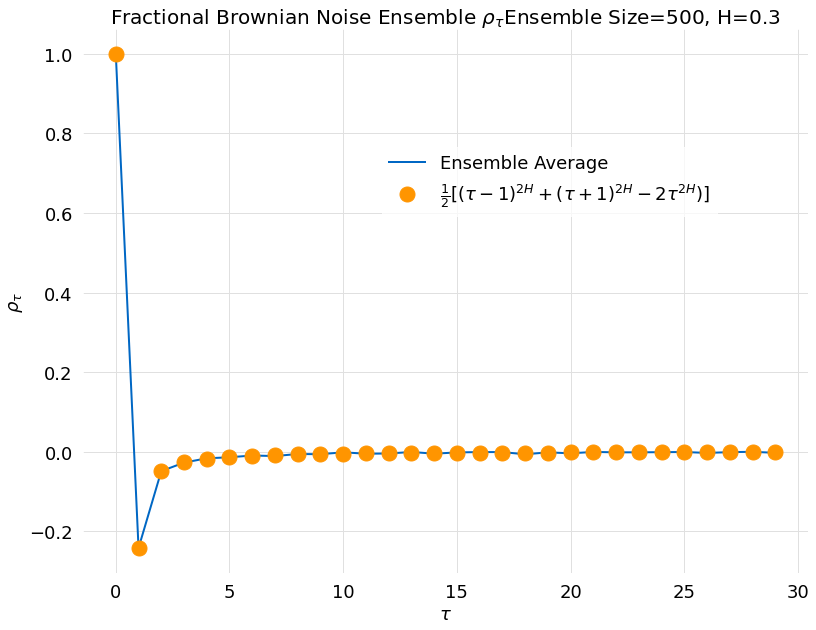

In [14]:
ac = stats.ensemble_acf(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble " + r"$\rho_\tau$" + f"Ensemble Size={nsims}, H={format(H, '1.1f')}"
plots.fcompare(ac[:nplot], title=title, params=[H], npts=nplot, data_type=PlotDataType.FBM_ACF)